In [79]:
from collections import defaultdict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.ticker import FixedLocator, FixedFormatter

In [80]:
BLEU_SCORES_PATH = 'scoring/bleu-scores'
SIMPLE_BLEU_SCORES_PATH = 'scoring/simple-bleu-scores'
INTERPOLATE_SCORES_PATH = 'scoring/interpolate-bleu-scores'

In [62]:
EN_DE_MODEL_NAME_DICT = {'baseline_en-de_8k_ep1': '8k_ep1',
    'baseline_en-de_8k_ep2': '8k_ep2',
    'baseline_en-de_8k_ep3': '8k_ep3',
    'baseline_en-de_8k_ep4': '8k_ep4',
    'baseline_en-de_8k_ep5': '8k_ep5',
    'baseline_en-de_8k_ep10': '8k_ep10',
    'baseline_en-de_8k_ep15': '8k_ep15',
    'baseline_en-de_8k_ep20': '8k_ep20',
    'baseline_en-de_8k_ep25': '8k_ep25',

    'baseline_en-de_16k_ep1': '16k_ep1',
    'baseline_en-de_16k_ep2': '16k_ep2',
    'baseline_en-de_16k_ep3': '16k_ep3',
    'baseline_en-de_16k_ep4': '16k_ep4',
    'baseline_en-de_16k_ep5': '16k_ep5',
    'baseline_en-de_16k_ep10': '16k_ep10',
    'baseline_en-de_16k_ep15': '16k_ep15',
    'baseline_en-de_16k_ep20': '16k_ep20',
    'baseline_en-de_16k_ep25': '16k_ep25',

    'baseline_en-de_32k_ep1': '32k_ep1',
    'baseline_en-de_32k_ep2': '32k_ep2',
    'baseline_en-de_32k_ep3': '32k_ep3',
    'baseline_en-de_32k_ep4': '32k_ep4',
    'baseline_en-de_32k_ep5': '32k_ep5',
    'baseline_en-de_32k_ep10': '32k_ep10',
    'baseline_en-de_32k_ep15': '32k_ep15',
    'baseline_en-de_32k_ep20': '32k_ep20',
    'baseline_en-de_32k_ep25': '32k_ep25',

    'baseline_en-de_64k_ep1': '64k_ep1',
    'baseline_en-de_64k_ep2': '64k_ep2',
    'baseline_en-de_64k_ep3': '64k_ep3',
    'baseline_en-de_64k_ep4': '64k_ep4',
    'baseline_en-de_64k_ep5': '64k_ep5',
    'baseline_en-de_64k_ep10': '64k_ep10',
    'baseline_en-de_64k_ep15': '64k_ep15',
    'baseline_en-de_64k_ep20': '64k_ep20',
    'baseline_en-de_64k_ep25': '64k_ep25'
    }

In [63]:
bleu_scores = defaultdict(dict)
simple_bleu_scores = {}
interpolate_bleu_scores = defaultdict(dict)
with open(BLEU_SCORES_PATH) as infile:
    for line in infile:
        line = line.strip().split('\t')
        if line[0] in EN_DE_MODEL_NAME_DICT.keys():
            model_one = EN_DE_MODEL_NAME_DICT[line[0]]
        else:
            model_one = line[0]
        if line[1] in EN_DE_MODEL_NAME_DICT.keys():
            model_two = EN_DE_MODEL_NAME_DICT[line[1]]
        else:
            model_two = line[1]
        try:
            score = float(line[2])
            bleu_scores[model_one][model_two] = score
            bleu_scores[model_two][model_one] = score
        except Exception as e:
            print(line, e)

with open(SIMPLE_BLEU_SCORES_PATH) as infile:
    for line in infile:
        line = line.strip().split('\t')
        
        if line[0] in EN_DE_MODEL_NAME_DICT.keys():
            model = EN_DE_MODEL_NAME_DICT[line[0]]
        else:
            model = line[0]
        try:
            score = float(line[1])
            simple_bleu_scores[model] = score
        except Exception as e:
            print(line, e)

with open(INTERPOLATE_SCORES_PATH) as infile:
    for line in infile:
        line = line.strip().split('\t')
        if line[0] in EN_DE_MODEL_NAME_DICT.keys():
            model_one = EN_DE_MODEL_NAME_DICT[line[0]]
        else:
            model_one = line[0]
        if line[1] in EN_DE_MODEL_NAME_DICT.keys():
            model_two = EN_DE_MODEL_NAME_DICT[line[1]]
        else:
            model_two = line[1]
        
        
        try:
            score = float(line[2])
            bleu_scores[model_one][model_two] = score
            bleu_scores[model_two][model_one] = score
        except Exception as e:
            print(line, e)

['baseline_en-de_8k_ep25', 'Llama-3.1-8B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['baseline_en-de_16k_ep25', 'Llama-3.2-3B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['baseline_en-de_16k_ep25', 'Llama-3.1-8B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['baseline_en-de_32k_ep25', 'Llama-3.1-8B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['baseline_en-de_64k_ep25', 'Llama-3.2-3B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['baseline_en-de_64k_ep25', 'Llama-3.1-8B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['m2m100_418M', 'Llama-3.1-8B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['m2m100_1.2B', 'Llama-3.2-3B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['m2m100_1.2B', 'Llama-3.1-8B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['nllb-200-distilled-600M', 'Llama-3.2-3B-Instruct-3-SHOT', '-'] could not convert string to float: '

In [64]:
delta_improvement = defaultdict(dict)
for model_one in bleu_scores:
    for model_two in bleu_scores[model_one]:
        delta_improvement[model_one][model_two] = bleu_scores[model_one][model_two] - max(simple_bleu_scores.get(model_one, 0), simple_bleu_scores.get(model_two, 0))

In [65]:
cmap = sns.diverging_palette(300, 145, s=100, as_cmap=True)

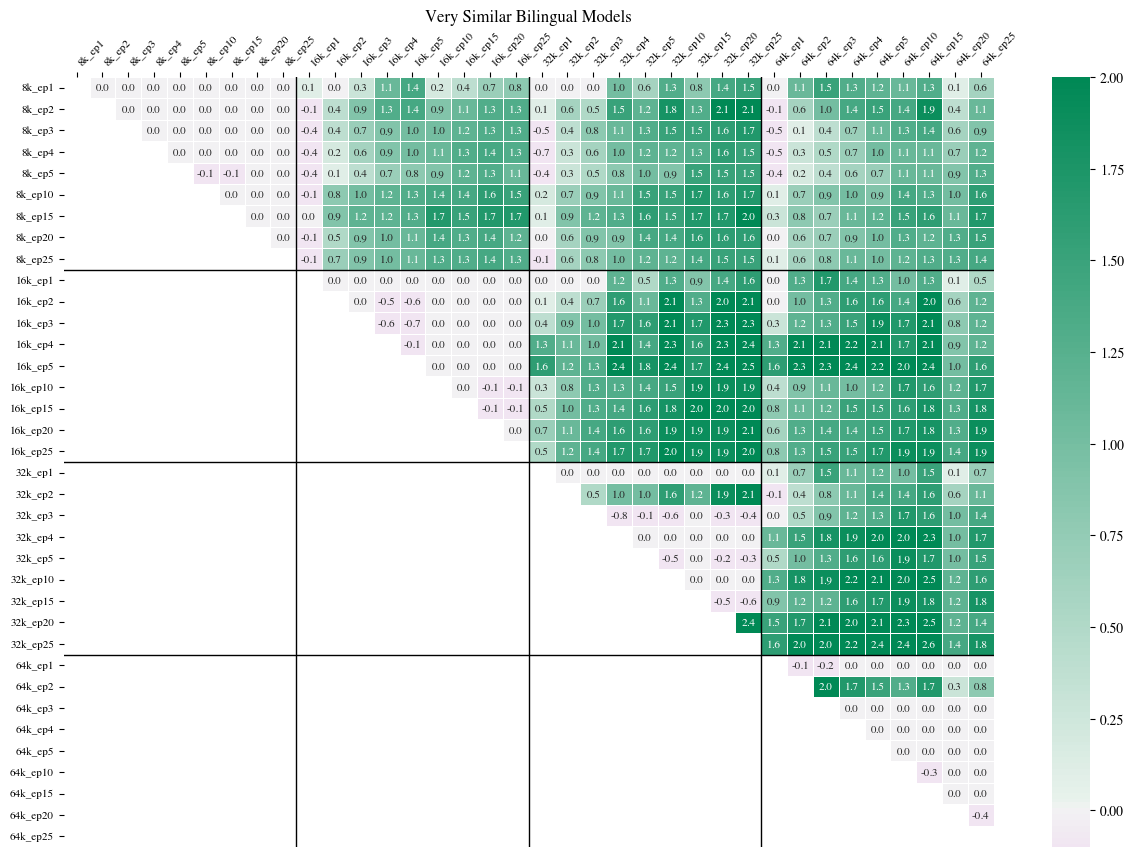

In [85]:
# Convert to DataFrame
# models = sorted(bleu_scores.keys())  # Ensure consistent order
models = [_ for _ in delta_improvement.keys() if _.startswith(('8k', '16k', '32k', '64k'))]


#print(models_formatted)

score_matrix = pd.DataFrame(delta_improvement, 
                            index=models,
                              columns=models)


# Create a mask for the lower triangle
mask = np.tril(np.ones_like(score_matrix, dtype=bool))



# Plot heatmap
plt.rcParams['font.family'] = 'Times'
plt.figure(figsize=(15, 10))

heatmap = sns.heatmap(
    score_matrix, 
    annot=True, 
    mask=mask, 
    annot_kws={"size": 8},
    fmt=".1f",
    cmap=sns.diverging_palette(300, 145, s=100, as_cmap=True),  # Red for negative, Yellow for zero, Green for positive
    linewidths=0.5, 
    center=0.0,  # Ensure zero is yellow, balancing red/green around zero
    vmin=-0.1,
    vmax=2
)
# Rotate x-axis labels and move to top
heatmap.xaxis.set_ticks_position('top')
plt.xticks(rotation=45, ha='left', fontsize=8)
plt.yticks(fontsize=8)
# Add horizontal and vertical lines to separate model groups
# 8k/16k boundary (after index 8)
plt.axhline(y=9, color='black', linewidth=1)
plt.axvline(x=9, color='black', linewidth=1)

# 16k/32k boundary (after index 17)
plt.axhline(y=18, color='black', linewidth=1)
plt.axvline(x=18, color='black', linewidth=1)

# 32k/64k boundary (after index 26)
plt.axhline(y=27, color='black', linewidth=1)
plt.axvline(x=27, color='black', linewidth=1)

plt.title("Very Similar Bilingual Models")
plt.show()

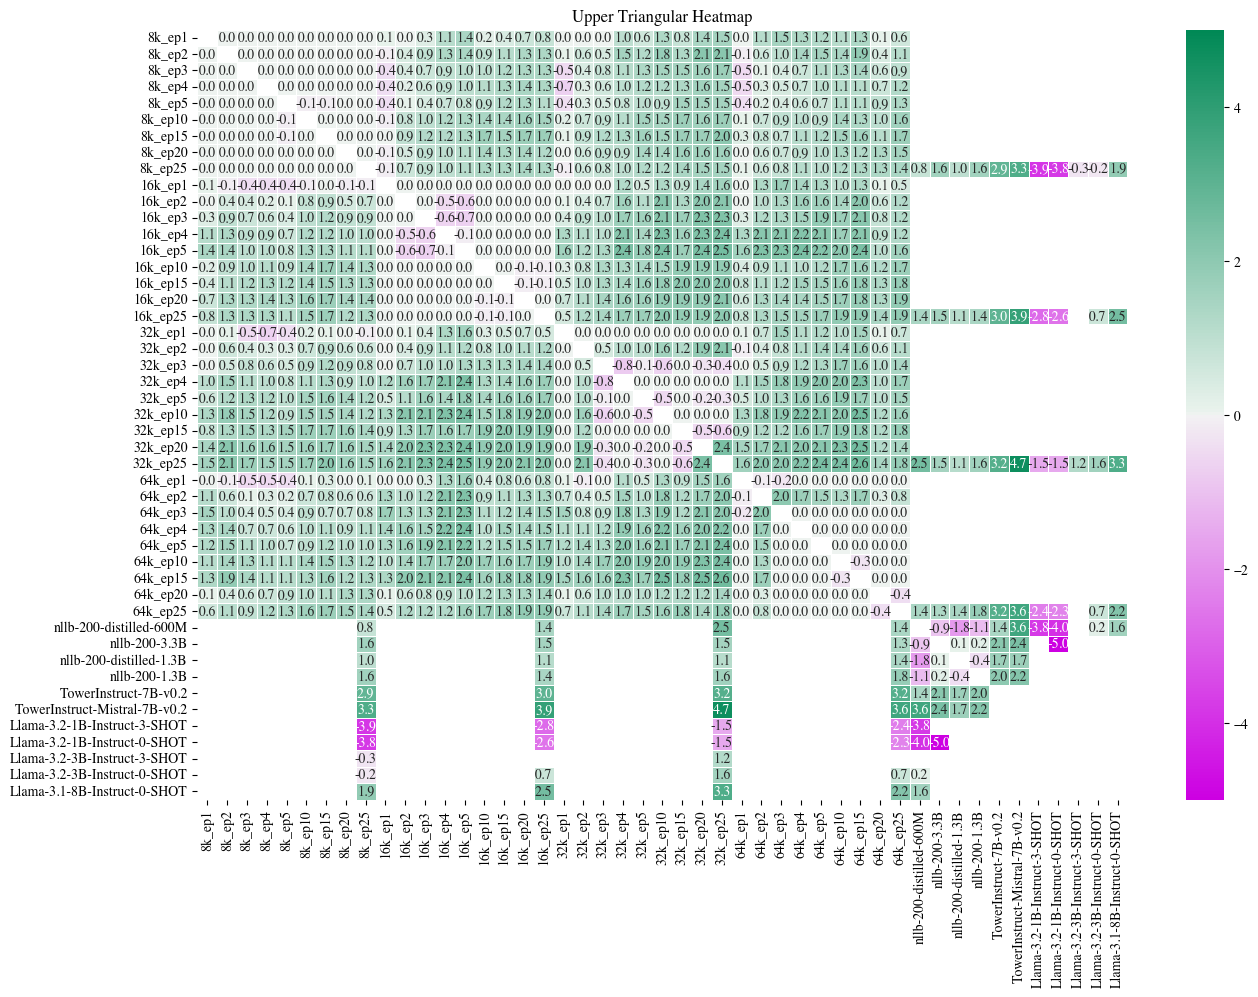

In [92]:
# Convert to DataFrame
# models = sorted(bleu_scores.keys())  # Ensure consistent order
models = [_ for _ in delta_improvement.keys() if _.endswith("ep25") or not _.startswith("8k,16k,32k,64k") and not "m2m" in _]
score_matrix = pd.DataFrame(delta_improvement, index=models, columns=models)

# Create a mask for the lower triangle
# mask = np.tril(np.ones_like(score_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(15, 10))

sns.heatmap(
    score_matrix, 
    annot=True, 
    fmt=".1f", 
    # mask=mask, 
    cmap=cmap,  # Red for negative, Yellow for zero, Green for positive
    linewidths=0.5, 
    center=0,  # Ensure zero is yellow, balancing red/green around zero
    vmax=5
)

plt.title("Upper Triangular Heatmap")
plt.show()